## Latar Belakang Masalah
Dataset ini dikumpulkan secara acak dari basis data sebuah perusahaan telekomunikasi di Iran selama periode 12 bulan. Dataset ini memiliki total 3150 baris data, di mana setiap baris merepresentasikan satu pelanggan, dan berisi informasi dari 14 kolom atau atribut: **`Call Failures, Complains, Subscription Length, Charge Amount, Seconds of Use, Frequency of use, Frequency of SMS, Distinct Called Numbers, Age Group, Tariff Plan, Status, Age, Customer Value, Churn`**.

Disini, **Churn (1: churn, 0: non-churn) merupakan variable dependent nya (label yang dicari)**.

## Tujuan
Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk:
- mengidentifikasi variabel kunci yang mempengaruhi status pelanggan (apakah mereka berhenti atau tetap),
- dan memprediksi status pelanggan tersebut.

Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak perusahaan telekomunikasi untuk mengatasi salah satu masalah penting dibidang tersebut.

## Terkait Dataset
Sumber data: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset   
Jumlah Sampel Data: 3150 records dengan 14 atributes

**Atribut untuk memprediksi status pelanggan (apakah mereka berhenti atau tetap)**:

Call Failures: number of call failures

Complains: binary (0: No complaint, 1: complaint)

Subscription Length: total months of subscription

Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)

Seconds of Use: total seconds of calls

Frequency of use: total number of calls

Frequency of SMS: total number of text messages

Distinct Called Numbers: total number of distinct phone calls

Age Group: ordinal attribute (1: younger age, 5: older age)

Tariff Plan: binary (1: Pay as you go, 2: contractual)

Status: binary (1: active, 2: non-active)

Customer Value: The calculated value of customer

**Fitur target**:

Churn: 1: churn, 0: non-churn


## LOAD LIBRARY - GUNAKAN MASUKKAN LIBRARY PYTHON YANG AKAN ANDA GUNAKAN


In [1]:
# Define the variable
folder_name = "/content/drive/My Drive/Colab Notebooks/BK/Latihan"

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

### baca dataset

In [4]:
# Baca dataset

df = pd.read_csv(f'{folder_name}/CustomerChurn.csv', skipinitialspace=True, na_values="?")

# Tampilkan beberapa baris pertama dan informasi dataset
df.head(5)

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

### baca informasi dataset

In [5]:
#melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

### baca informasi dataset terkait missing value

In [6]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [7]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
Call  Failure              0.0
Complains                  0.0
Subscription  Length       0.0
Charge  Amount             0.0
Seconds of Use             0.0
Frequency of use           0.0
Frequency of SMS           0.0
Distinct Called Numbers    0.0
Age Group                  0.0
Tariff Plan                0.0
Status                     0.0
Age                        0.0
Customer Value             0.0
Churn                      0.0
dtype: float64


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### Analisis Statistik Deskriptif

In [8]:
# Analisis Statistik Deskriptif

# Statistik deskriptif untuk variabel numerik
df.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

Penjelasan Statistik Deskriptif untuk Variabel Numerik:
- count: Jumlah data non-null
- mean: Rata-rata
- std: Standar deviasi
- min: Nilai minimum
- 25%: Kuartil pertama (Q1)
- 50%: Median atau kuartil kedua (Q2)
- 75%: Kuartil ketiga (Q3)
- max: Nilai maksimum

Statistik deskriptif untuk variabel kategorikal tidak dilakukan karena dataset tidak memiliki variabel kategorikal.

### distribusi target variable

In [9]:
# Distribusi target variable
df['Churn'].value_counts(normalize=True)

Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64

penjelasan:
- Distribusi Kelas:
  - 84.285% dari sampel memiliki class 0 (non-churn).
  - 15.714% dari sampel memiliki class 1 (churn).
- Ketidakseimbangan Kelas (Class Imbalance):
  - Dataset ini menunjukkan ketidakseimbangan kelas yang cukup signifikan.

Implikasi untuk Analisis dan Pemodelan:
- Representasi Populasi:

  - Mayoritas data dalam dataset termasuk dalam kategori non-churn.

- Pemilihan Metrik Evaluasi:

  - Akurasi saja mungkin tidak cukup sebagai metrik evaluasi karena bisa menyesatkan dalam kasus data yang tidak seimbang.
  - Metrik seperti precision, recall, F1-score, atau AUC-ROC mungkin lebih informatif.

  - Pemilihan Algoritma:

  - Beberapa algoritma, seperti Random Forest atau Gradient Boosting, cenderung lebih baik dalam menangani ketidakseimbangan kelas (**disini, akan digunakan decision tree**)

- Interpretasi Hasil:

  - Penting untuk mempertimbangkan baseline model (misalnya, selalu memprediksi kelas mayoritas akan memberikan akurasi 84.285%).
  - Peningkatan kecil dalam performa mungkin sudah signifikan mengingat ketidakseimbangan ini.

### visualisasi distribusi

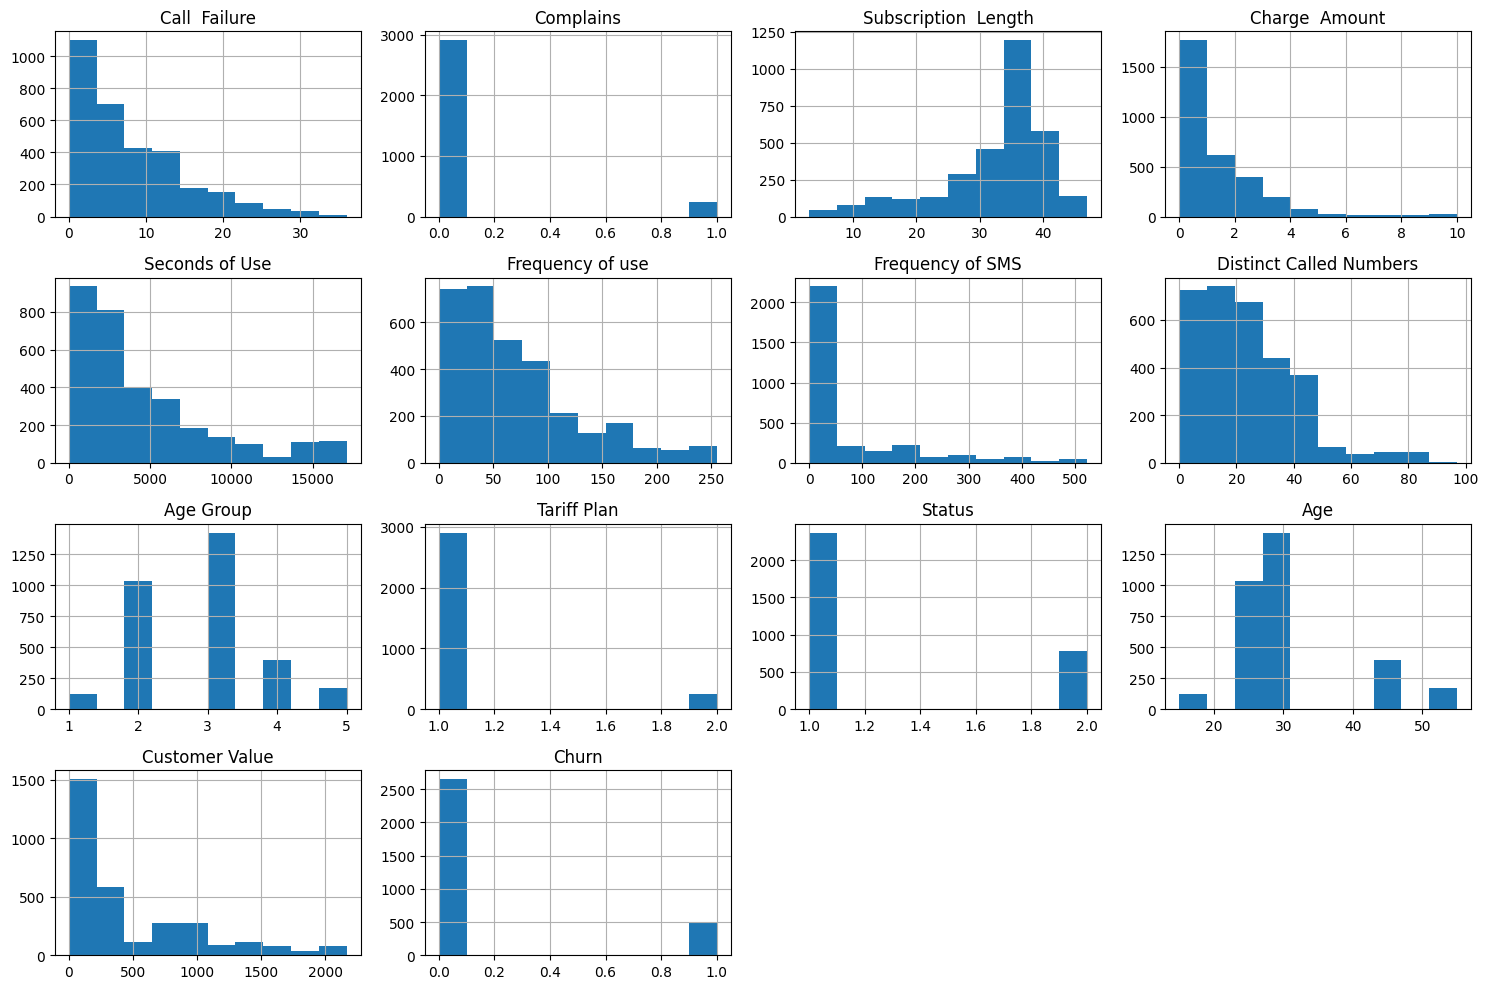

In [ ]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

1. Call Failures (Jumlah Kegagalan Panggilan): Menunjukkan jumlah kegagalan panggilan yang dialami pelanggan. **Sebagian besar pelanggan mengalami 0 hingga 5 kegagalan panggilan (sekitar 1700), dan Hanya sedikit pelanggan yang mengalami lebih dari 10 kegagalan panggilan (dibawah 500). Distribusi terlihat menurun tajam (setelah angka 5), menunjukkan bahwa kegagalan panggilan jarang terjadi.**

2. Complains (Keluhan): dimana 0 menunjukkan no complaint, sedangkan 1 menunjukkan complaint. **Hampir semua pelanggan (mendekati 3000) tidak mengajukan keluhan (nilai 0) dan sangat sedikit pelanggan yang mengajukan keluhan (nilai 1).**

3. Subsciption Lenght (Durasi berlangganan): menunjukkan jumlah bulan durasi berlangganan. **Jumlah tertinggi (mendekati 1250) pelanggan memiliki durasi berlangganan di angka 30 - 40 bulan. Hal ini menunjukkan pola keanggotaan pelanggan yang konsisten.**

4. Charge Amount (Jumlah Tagihan): merepresentasikan tingkat tagihan pelanggan, dimana 0 merupakan jumlah terendah sedangkan 9 tertinggi. **Sebagian besar pelanggan berada pada tingkat tagihan rendah (0 hingga 2) dan sedikit pelanggan yang membayar di tingkat tagihan tinggi (8 atau 9).**

5. Seconds of Use (Total Durasi Penggunaan dalam Detik): Total waktu panggilan yang dilakukan pelanggan dalam detik. **Sebagian besar pelanggan melakukan panggilan dengan durasi 0 hingga 5000 detik, dan hanya sedikit pelanggan yang menggunakan layanan hingga lebih dari 5000 sampai 15.000 detik.**

6. Frequency of Use (Frekuensi penggunaan): Total jumlah panggilan yang dilakukan pelanggan. **Sebagian besar pelanggan melakukan panggilan sebanyak 0 - 50 (menunjukkan bar frekuensi yang tinggi).**

7. Frequency of SMS (Frekuensi SMS): Total jumlah SMS yang dilakukan pelanggan. **Frekuensi dengan bar tertinggi (lebih dari 2000 pelanggan) menunjukkan sebagian besar pelanggan melakukan SMS di angka 0 - 50).**

8. Distinct Called Numbers (Jumlah nomor telepon unik): Total jumlah nomor telepon berbeda yang dihubungi pelanggan. **Sebagian besar pelanggan melakukan panggilan ke 10 hingga 20 nomor telepon unik. Frekuensi menurun tajam untuk lebih dari 40 nomor unik.**

9. Age Group (Kelompok usia): dimana 1 menunjukkan usia yang lebih muda sampai ke 5 menunjukkan usia yang lebih tua. **Sebagian besar pelanggan berada di kelompok usia 2 dan 3 (usia menengah).**

10. Tariff Plan (Paket tarif): dimana menunjukkan 1: Pay as you go, 2: contractual. **Sebagian besar pelanggan (mendekati 3000) menggunakan paket tarif 1 (pay as you go). Hanya sedikit pelanggan yang menggunakan paket tarif contractual.**

11. Status: dimana 1 menunjukkan status pelanggan aktif, dan 2 menunjukkan status pelanggan tidak aktif. **Sebagian besar (lebih dari 2000 pelanggan) tergolong status aktif.**

12. Age (usia): sebagian besar usia pelanggan berada di antara 20 - 30 tahun.

13. Customer Value (Nilai Pelanggan): dihitung berdasarkan kontribusi pelanggan. **Sebagian besar memiliki nilai di bawah 500.**

14. Churn (berhenti berlangganan), dimana **Sebagian besar pelanggan non-churn (nilai 0), yang berarti tetap berlangganan.**

In [ ]:
# Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

Tidak ada hasil visualisasi barplot variabel kategorikal karena dataset seluruhnya sudah bertipe numerik

### analisis korelasi

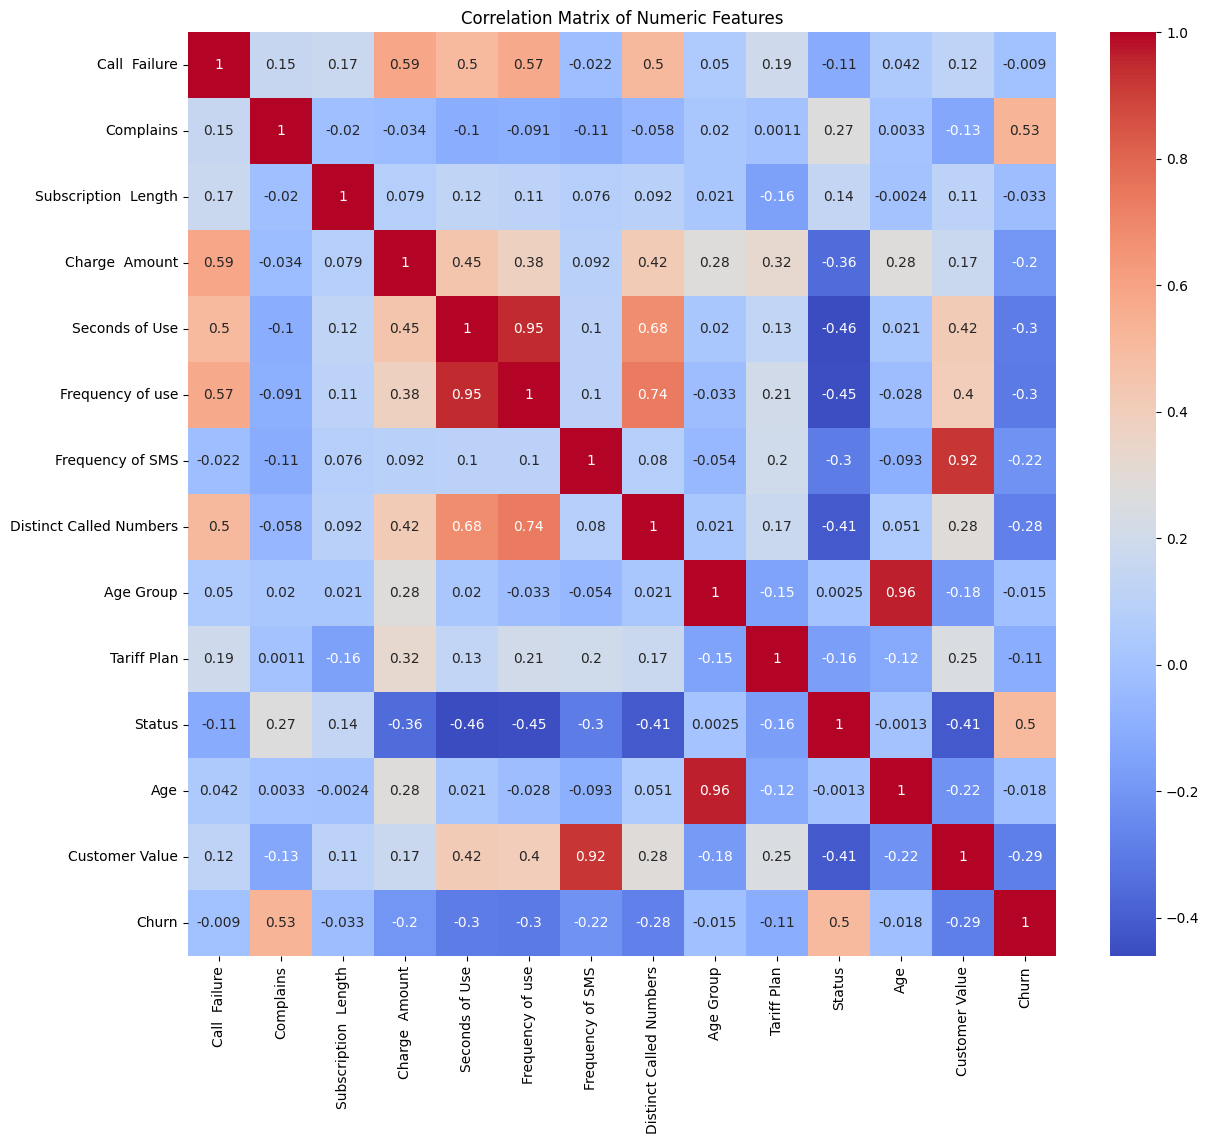

In [ ]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Grafik diatas merupakan correlation matrix yang menunjukkan hubungan antar fitur numerik dalam dataset. Warna pada matriks menunjukkan kekuatan dan arah korelasi: merah berarti korelasi positif kuat, biru menunjukkan korelasi negatif kuat, dan warna lebih pucat menunjukkan korelasi lemah.
- Pada pada fitur target, Churn, terlihat bahwa Complains (0.53) dan Status (0.50) memiliki korelasi positif yang cukup signifikan dengan churn, artinya pelanggan yang memiliki keluhan atau status tertentu cenderung churn.
- Masih pada fitur Churn, hubungannya dengan fitur lain seperti Seconds of Use (-0.30), Frequency of Use (-0.30), dan Customer Value (-0.29) memiliki korelasi negatif, menunjukkan bahwa semakin tinggi nilai fitur tersebut(nilai dari fitur itu sendiri), semakin kecil kemungkinan churn.
- Selain itu, fitur Seconds of Use dan Frequency of Use (0.95), serta Age Group dan Age (0.96) sangat berkorelasi satu sama lain, sehingga menandakan kemungkinan redundansi.


### Analisis Hubungan dengan Target Variable

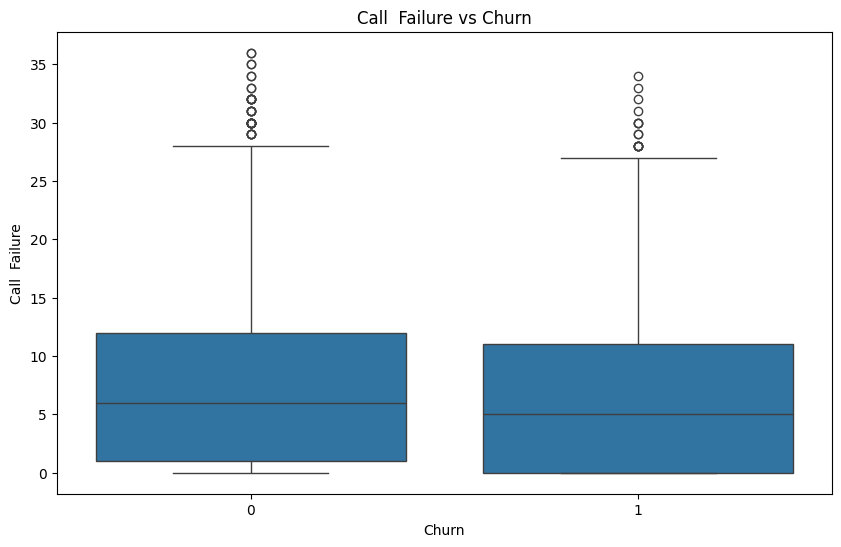

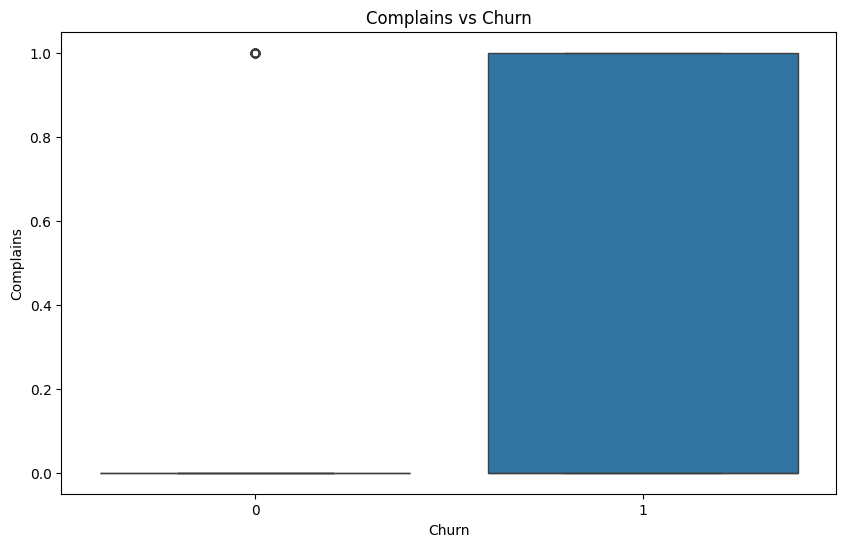

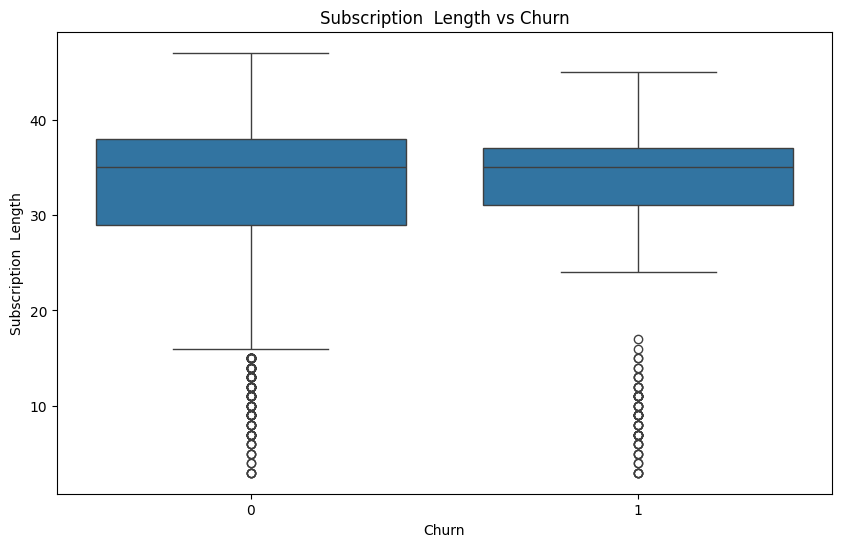

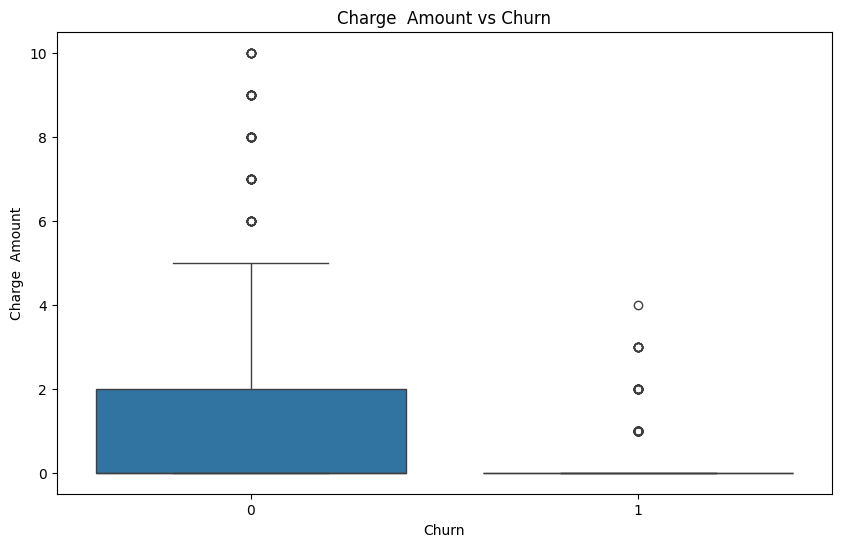

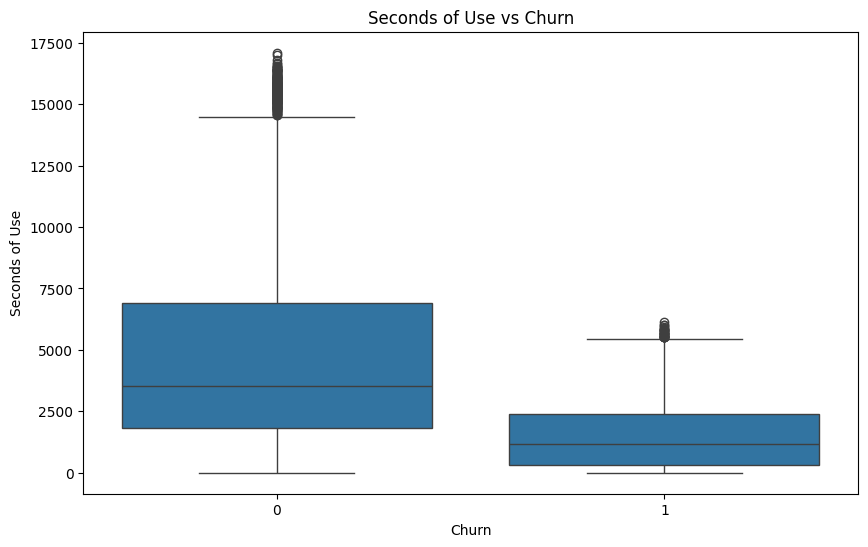

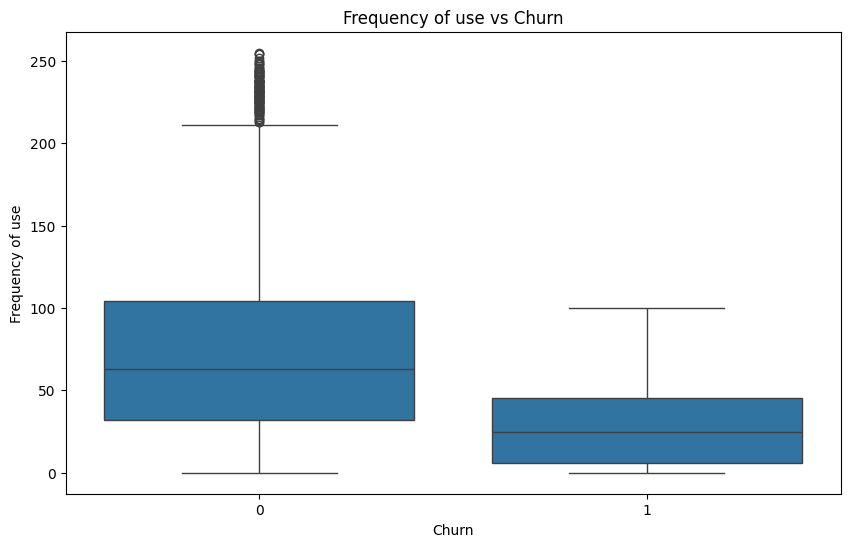

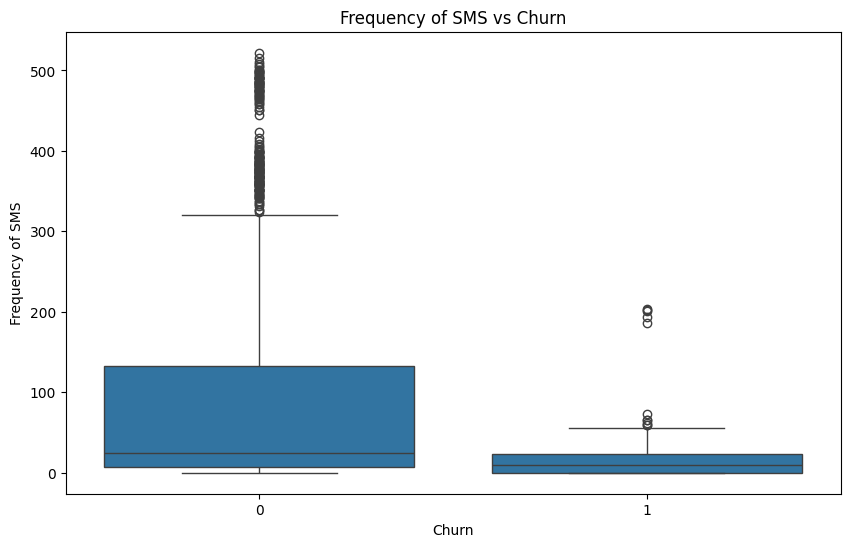

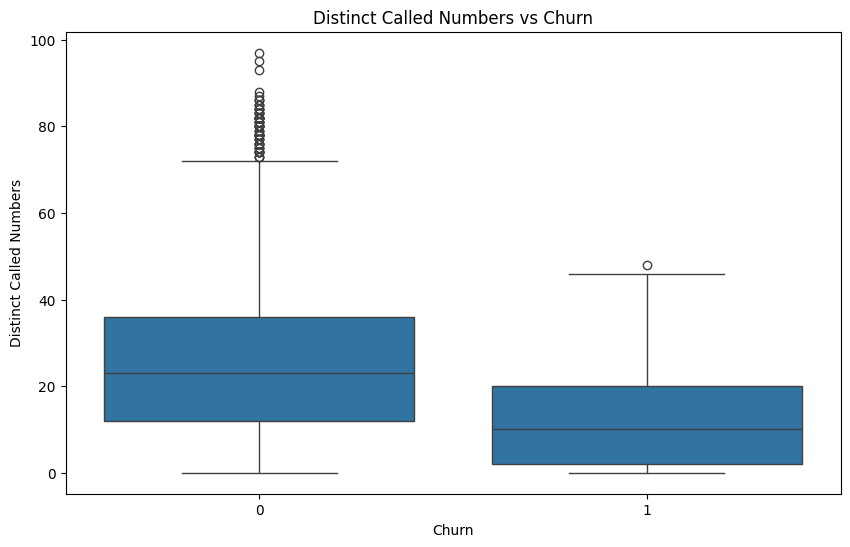

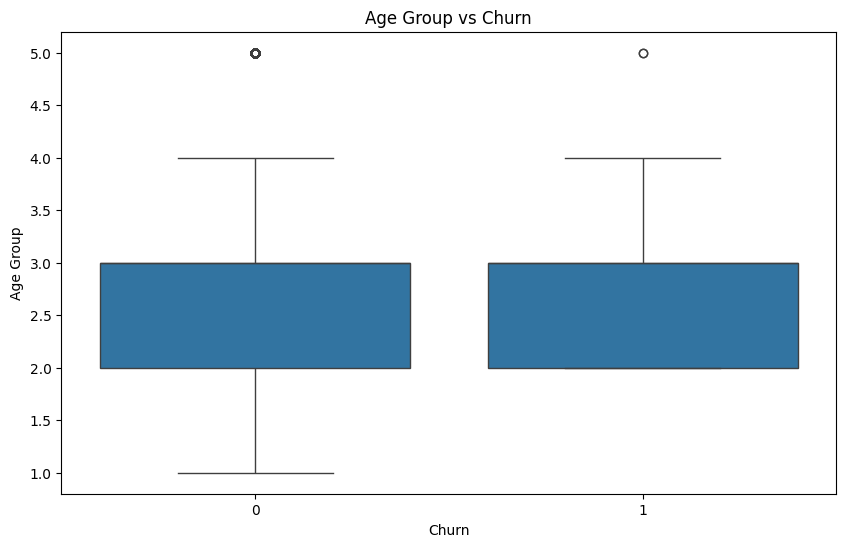

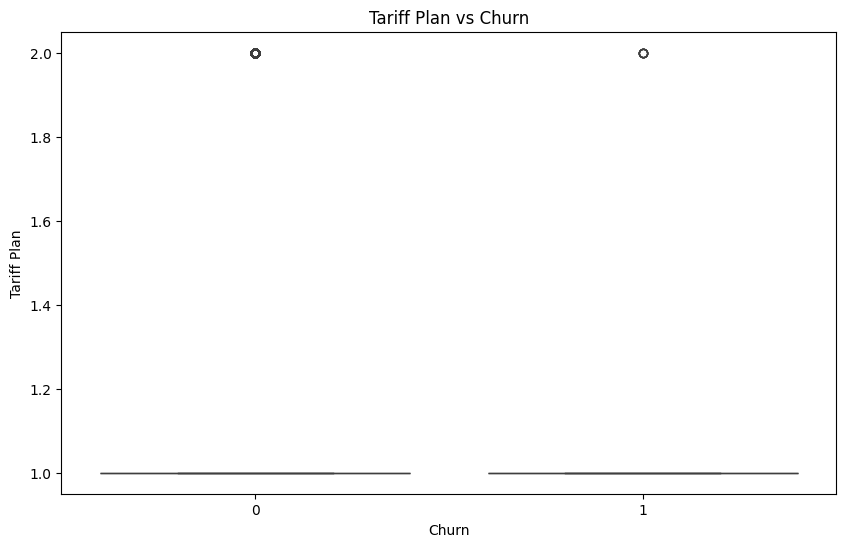

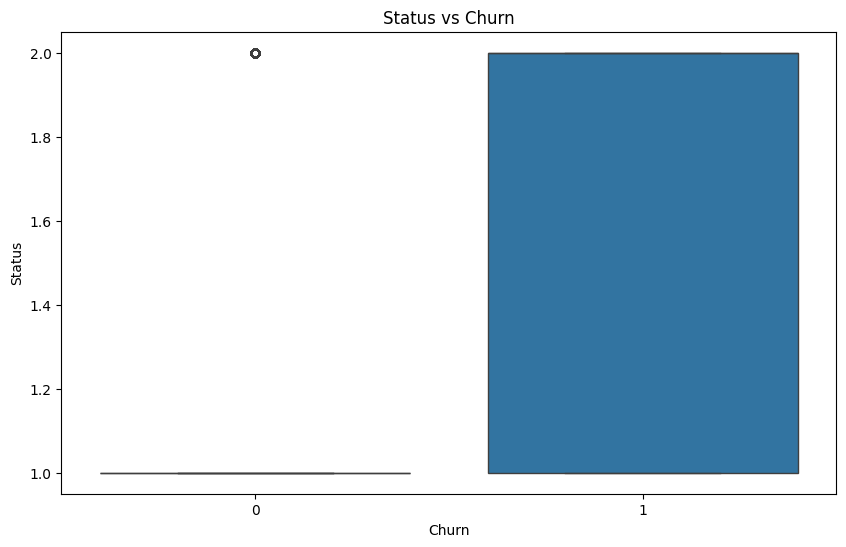

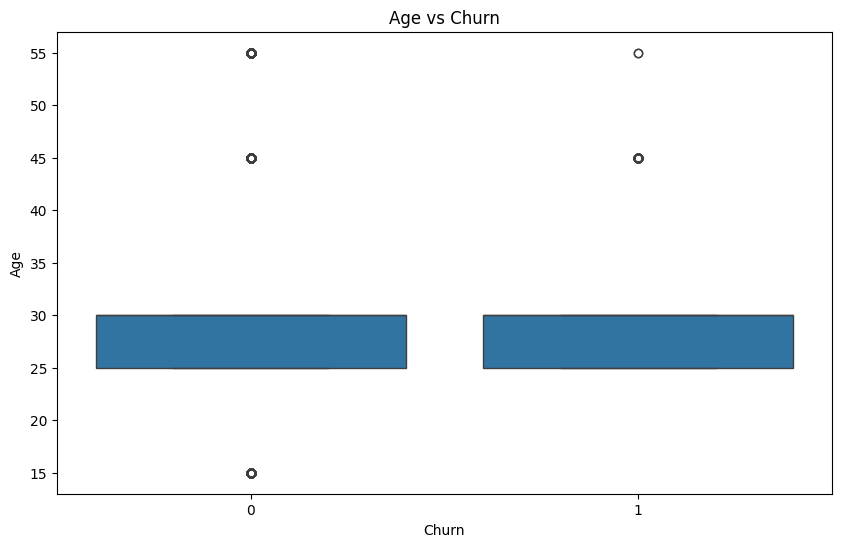

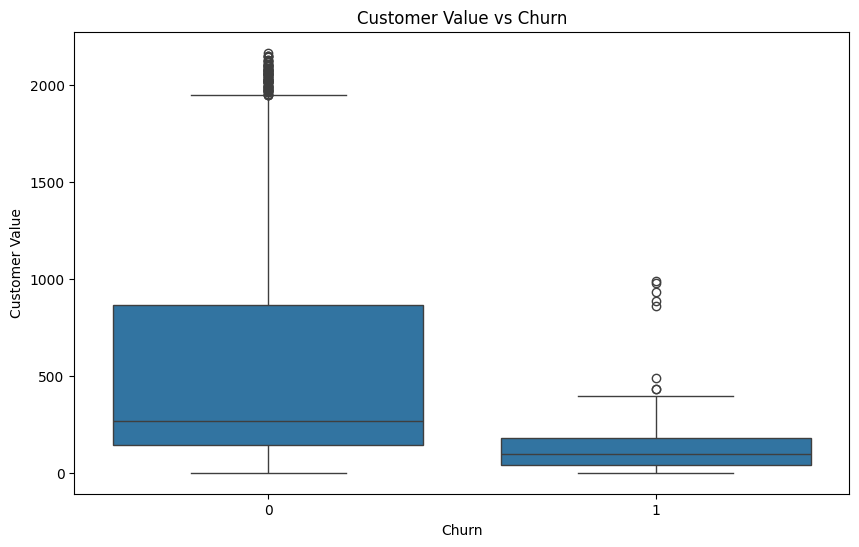

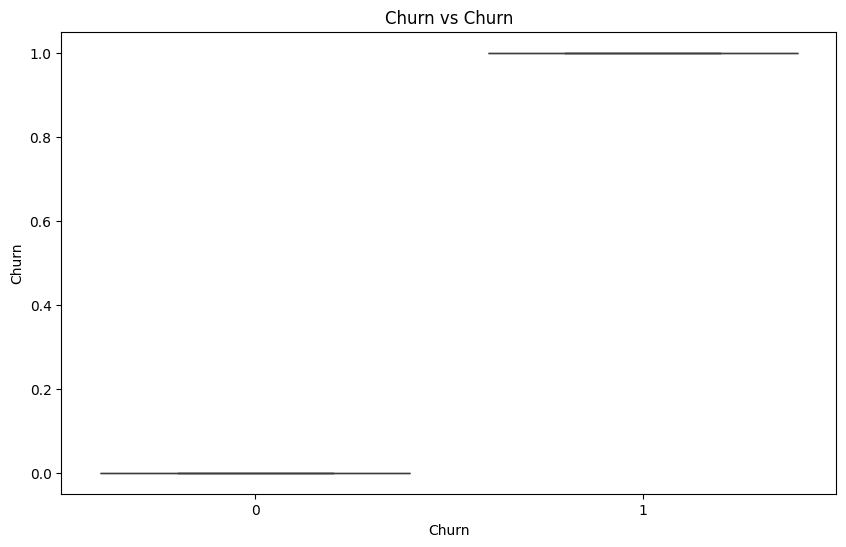

In [ ]:
# Boxplot numerik vs target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
    plt.show()

Grafik-grafik tersebut adalah boxplot yang membandingkan distribusi antar fitur lain (di sumbu Y) terhadap churn (di sumbu X).
- Kotak berwarna biru menunjukkan interquartile range (IQR), yakni **rentang data** antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Ini merepresentasikan 50% data tengah dalam distribusi. Didalam kotak ini terdapat garis horizontal yang menunjukkan median atau nilai tengah.
- Garis vertikal di luar kotak, yang dikenal sebagai whiskers, menunjukkan nilai minimum dan maksimum data yang masih dianggap wajar
- Titik-titik diluar kotak disebut outliers, yaitu data yang berada di luar batas wajar, yang sering merepresentasikan nilai ekstrem yang berbeda dari pola umum data.
- **Jika boxplot antar dua kelompok sama atau hampir sama**, artinya distribusi data pada kedua kelompok yang dibandingkan cenderung serupa, menunjukkan bahwa variabel tersebut kemungkinan tidak memiliki hubungan signifikan dengan variabel target (misalnya, churn). Dalam konteks klasifikasi, variabel ini mungkin kurang informatif untuk membedakan antara kelompok churn dan tidak churn.
- **Jika boxplot antar dua kelompok berbeda** artinya distribusi data pada kedua kelompok memiliki perbedaan yang signifikan, yang menunjukkan bahwa variabel yang dibandingkan kemungkinan memiliki hubungan atau pengaruh dengan variabel target (misalnya, churn).

1. Call Failure vs Churn
Pada kedua kelompok, nilai median (garis horizontal di dalam kotak) terlihat hampir sama, menunjukkan tidak ada perbedaan signifikan dalam kegagalan panggilan antara pelanggan yang churn dan yang tidak churn. Hal ini menunjukkan bahwa call failure mungkin tidak memiliki hubungan langsung yang kuat dengan churn berdasarkan distribusi ini.

2. Frequency of SMS vs Churn
Secara umum, terlihat bahwa pelanggan yang non-churn memiliki rentang frekuensi SMS yang jauh lebih luas, dengan median di sekitar angka 50-100 SMS, serta terdapat banyak outliers yang mencapai lebih dari 500 SMS. Sebaliknya, pelanggan yang churn memiliki median yang jauh lebih rendah, sekitar 0-10 SMS, dengan rentang yang sangat sempit dan beberapa outliers di kisaran 100 SMS. Hal ini menunjukkan bahwa frekuensi SMS mungkin memiliki hubungan dengan churn, di mana pelanggan yang lebih jarang mengirim SMS cenderung lebih mungkin untuk churn.

3. Churn vs Churn
Grafik ini hanya menunjukkan bahwa semua data pada kategori "Churn = 0" bernilai 0, dan semua data pada kategori "Churn = 1" bernilai 1. Karena variabel di sumbu X dan Y adalah sama, grafik tidak memberikan informasi tambahan.

In [ ]:
# Stacked bar plot kategorikal vs target
for feature in categorical_features:
    if feature != 'class':
        plt.figure(figsize=(18, 10))
        df_temp = df.groupby([feature, 'class']).size().unstack()
        df_temp_perc = df_temp.div(df_temp.sum(axis=1), axis=0)
        df_temp_perc.plot(kind='bar', stacked=True)
        plt.title(f'{feature} vs class')
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.legend(title='class', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()

visualisasi stacked bar plot kategorikal vs target tidak muncul karena tidak ada kolom atau fitur yang bertipe kategorikal

### Identifikasi Outlier

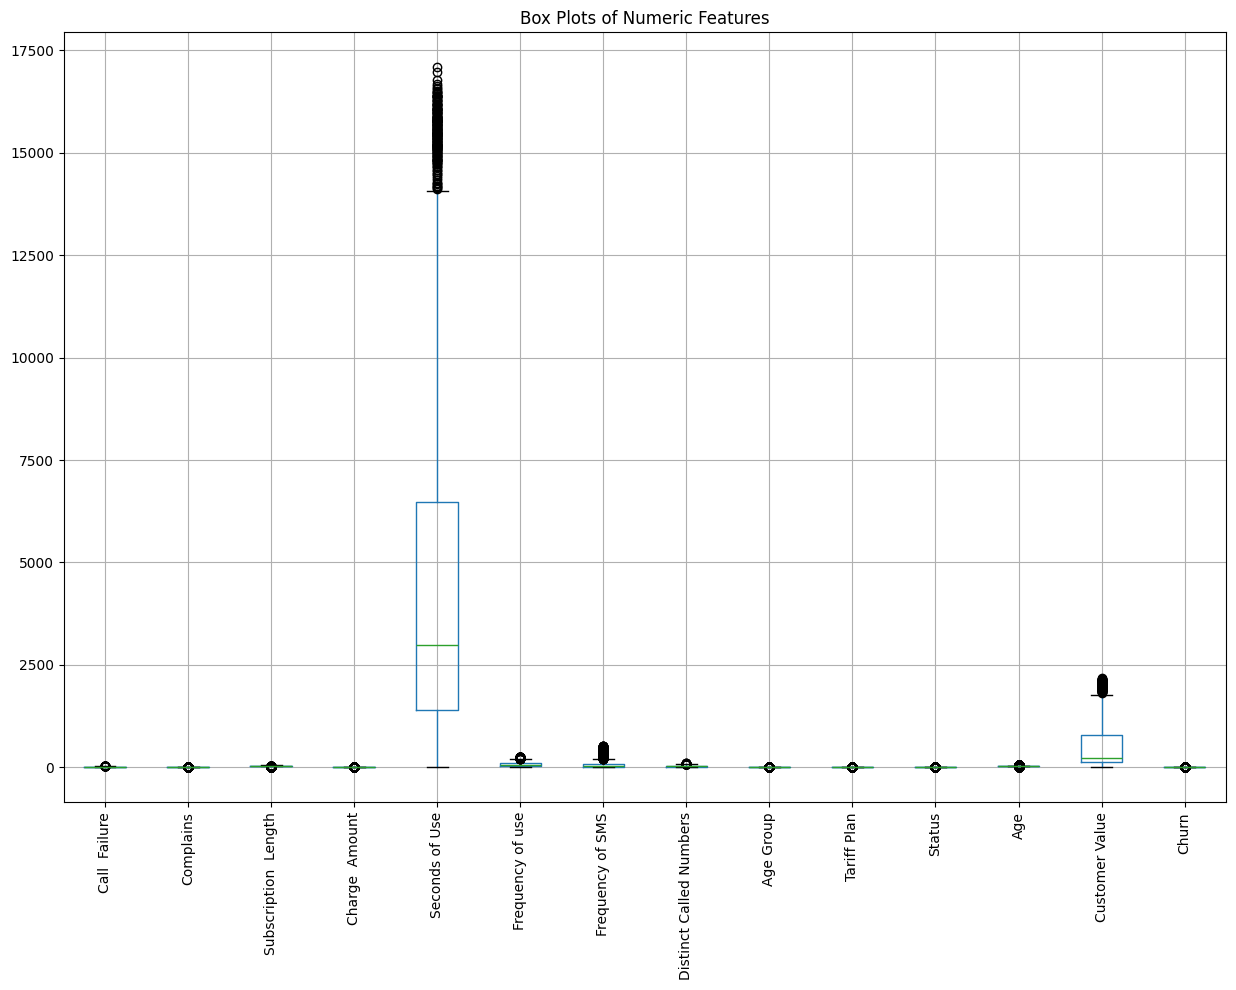

In [ ]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

Grafik di atas merupakan box plot yang menunjukkan distribusi fitur numerik dalam dataset "Iranian Churn." Setiap fitur ditampilkan secara terpisah di sumbu x, dengan nilai pada sumbu y. Dari grafik ini, terlihat bahwa fitur 'Seconds of Use' memiliki rentang nilai yang jauh lebih besar dibandingkan fitur lainnya, dengan banyak outliers di atas 15.000. Sementara itu, fitur seperti 'Call Failure' sampai 'Charge Amount' memiliki nilai yang sangat kecil atau stabil, kemungkinan menunjukkan variabilitas rendah. Fitur Customer Value juga memiliki sebaran kecil dengan beberapa outliers.


## BAB 3 – (J.62DMI00.006.1) memvalidasi data
**TIDAK PERLU MELAKUKAN CEK KONSISTENSI DATA**

### Periksa Missing Values

In [ ]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                         Total  Percent
Call  Failure                0      0.0
Complains                    0      0.0
Subscription  Length         0      0.0
Charge  Amount               0      0.0
Seconds of Use               0      0.0
Frequency of use             0      0.0
Frequency of SMS             0      0.0
Distinct Called Numbers      0      0.0
Age Group                    0      0.0
Tariff Plan                  0      0.0
Status                       0      0.0
Age                          0      0.0
Customer Value               0      0.0
Churn                        0      0.0


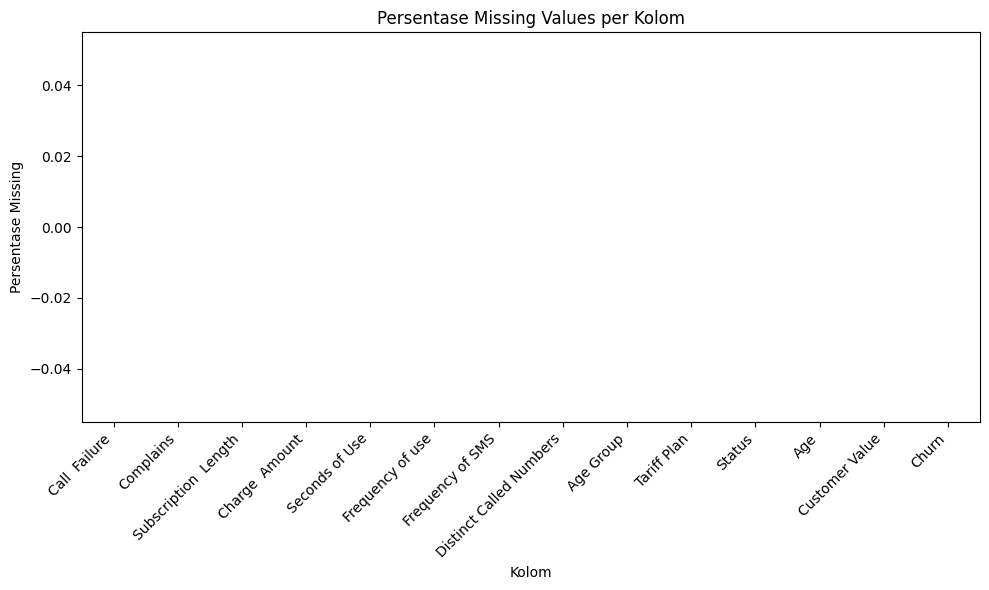

In [ ]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Periksa duplikat

In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 300

Contoh baris duplikat:
   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   
5             11          0                    38               1   
6              4          0                    38               0   
7             13          0                    37               2   
8              7          0                    38               0   
9              7          0                    38               1   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453 

### Validasi Tipe Data

In [ ]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object


### validasi nilai range

In [ ]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Call  Failure:
Min: 0, Max: 36

Range nilai untuk Complains:
Min: 0, Max: 1

Range nilai untuk Subscription  Length:
Min: 3, Max: 47

Range nilai untuk Charge  Amount:
Min: 0, Max: 10

Range nilai untuk Seconds of Use:
Min: 0, Max: 17090

Range nilai untuk Frequency of use:
Min: 0, Max: 255

Range nilai untuk Frequency of SMS:
Min: 0, Max: 522

Range nilai untuk Distinct Called Numbers:
Min: 0, Max: 97

Range nilai untuk Age Group:
Min: 1, Max: 5

Range nilai untuk Tariff Plan:
Min: 1, Max: 2

Range nilai untuk Status:
Min: 1, Max: 2

Range nilai untuk Age:
Min: 15, Max: 55

Range nilai untuk Customer Value:
Min: 0.0, Max: 2165.28

Range nilai untuk Churn:
Min: 0, Max: 1


### ringkasan validasi (bisa ditulis dalam catatan):
a. Missing Values: tidak terdapat missing value dalam dataset.

b. Duplikat: terdapat 300 baris duplikat.

c. Tipe Data:

Semua kolom memiliki tipe data yang sama, yakni numerik. Sehingga tidak ada nilai non-numerik.


## BAB 4 – (J.62DMI00.007.1) menentukan object data

**WAJIB DIISI**,

JUMLAH FITUR: '14'

JUMLAH RECORDS: '3150'

TARGETNYA ADALAH: 'Churn'

## BAB 5 – (J.62DMI00.008.1) membersihkan data
- **ANDA TIDAK PERLU MELAKUKAN OUTLIER REMOVAL**

### Menangani Missing Values

In [ ]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median (karena banyak outlier)
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

Missing values setelah pembersihan:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


<ipython-input-22-c971b22ac18b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


### menangani duplikat

In [ ]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 300
Jumlah baris setelah menghapus duplikat: 2850


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

### validasi hasil pembersihan

In [ ]:
df.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [ ]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/CustChurn_Cleaned.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'CustChurn_Cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'CustChurn_Cleaned.csv'


## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data
CATATAN:
- **UNTUK UJIN INI, ANDA TIDAK PERLU MELAKUKAN FEATURE ENGINEERING DISINI**
- NAMUN ANDA WAJIB MERUBAH FORMAT TIPE DATA (JIKA ADA) MENJADI NUMERIK

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

In [ ]:
df.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

### transformasi data

Transformasi data (merubah menjadi numerik) tidak dilakukan karena data dari awal seluruhnya sudah bertipe numerik.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

### cek kembali korelasi

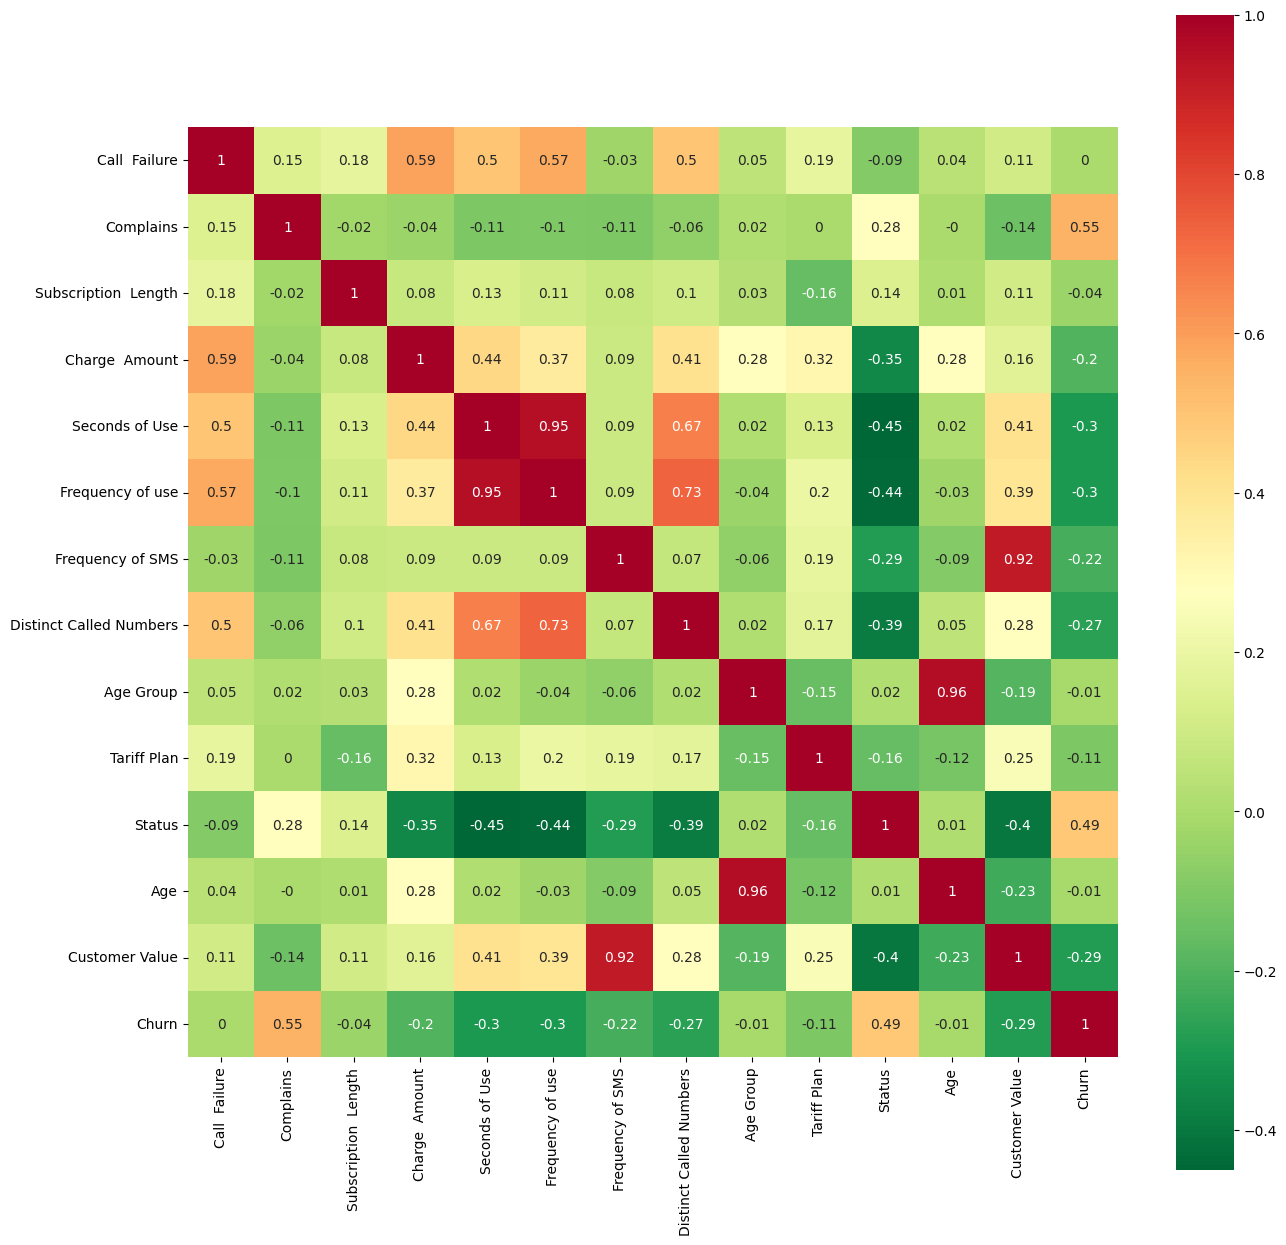

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

* terdapat beberapa fitur yang memiliki korelasi tinggi terhadap target. Sehingga harus dihapus, dimanan batasan = 0.9
* untuk konteks klasifikasi, yang dicari adalah korelasi antar fitur rendah

### penghapusan fitur yang bernilai konstan

In [ ]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [ ]:
df

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3096             17          0                    17               1   
3097             13          0                    18               4   
3099              8          1                    11               2   
3123             26          0                    38               9   
3131              5          1                    38               0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3096            9237               177                80   
3097            3157                51                38   
3099            1792                25                 7   
3123           10740                99                 8   
3131             933                13                16   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                          17          3            1       1   30   
1                           4          2            1       2   25   
2                          24          3            1       1   30   
3                          35          1            1       1   15   
4                          33          1            1       1   15   
...                       ...        ...          ...     ...  ...   
3096                       42          5            1       1   55   
3097                       21          3            1       1   30   
3099                        9          3            1       1   30   
3123                       44          5            2       1   55   
3131                        6          4            1       2   45   

      Customer Value  Churn  
0            197.640      0  
1             46.035      0  
2           1536.520      0  
3            240.020      0  
4            145.805      0  
...              ...    ...  
3096         261.210      0  
3097         280.320      0  
3099         100.680      1  
3123         174.585      0  
3131          63.650      1  

[2850 rows x 14 columns]

### penghapusan fitur berkorelasi tinggi

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
data_tanpa_fitur = df.drop('Churn', axis=1)

In [ ]:
corr_features = correlation(data_tanpa_fitur, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  3
{'Age', 'Customer Value', 'Frequency of use'}


In [ ]:
# removed correlated  features
df.drop(labels=corr_features, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Call  Failure            2850 non-null   int64
 1   Complains                2850 non-null   int64
 2   Subscription  Length     2850 non-null   int64
 3   Charge  Amount           2850 non-null   int64
 4   Seconds of Use           2850 non-null   int64
 5   Frequency of SMS         2850 non-null   int64
 6   Distinct Called Numbers  2850 non-null   int64
 7   Age Group                2850 non-null   int64
 8   Tariff Plan              2850 non-null   int64
 9   Status                   2850 non-null   int64
 10  Churn                    2850 non-null   int64
dtypes: int64(11)
memory usage: 267.2 KB


In [ ]:
df.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    2850.000000  2850.000000           2850.000000     2850.000000   
mean        7.802456     0.080702             32.452982        0.974737   
std         7.326172     0.272424              8.723075        1.550618   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             29.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        2.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of SMS  Distinct Called Numbers    Age Group  \
count     2850.000000       2850.000000              2850.000000  2850.000000   
mean      4534.243158         73.789825                23.870526     2.835088   
std       4199.712303        112.062397                17.193929     0.893503   
min          0.000000          0.000000                 0.000000     1.000000   
25%       1458.750000          7.000000                11.000000     2.000000   
50%       3041.000000         22.000000                21.000000     3.000000   
75%       6500.000000         88.000000                34.000000     3.000000   
max      17090.000000        522.000000                97.000000     5.000000   

       Tariff Plan       Status        Churn  
count  2850.000000  2850.000000  2850.000000  
mean      1.080351     1.240000     0.156491  
std       0.271883     0.427158     0.363384  
min       1.000000     1.000000     0.000000  
25%       1.000000     1.000000     0.000000  
50%       1.000000     1.000000     0.000000  
75%       1.000000     1.000000     0.000000  
max       2.000000     2.000000     1.000000

### cek kembali korelasi

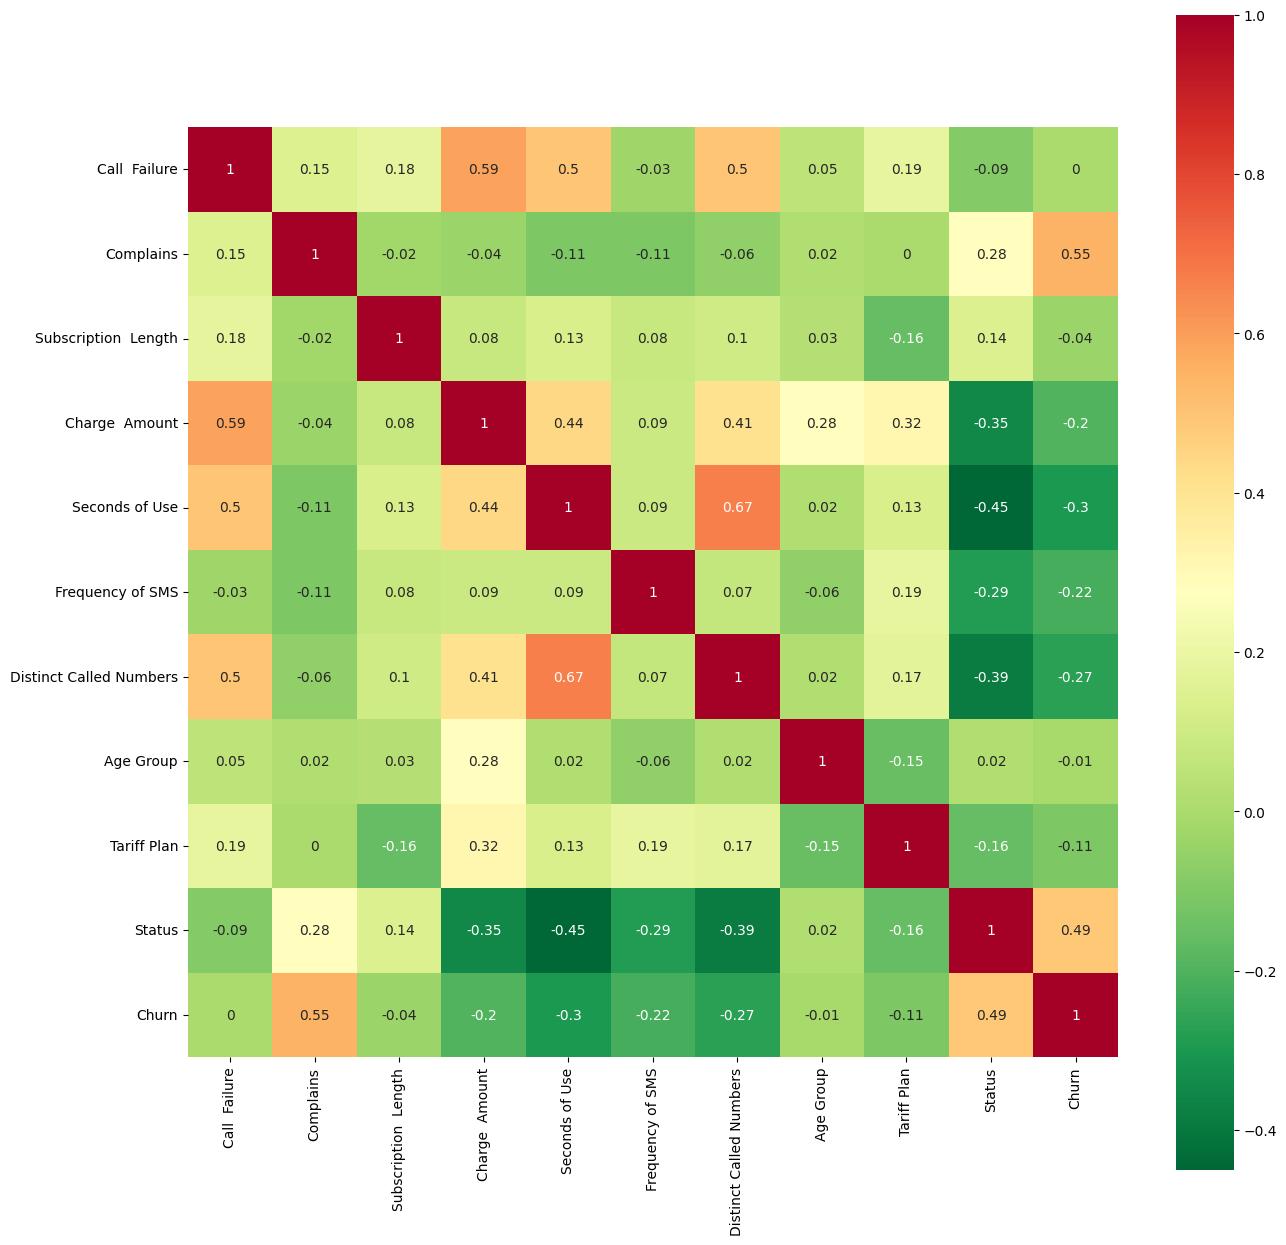

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## BAB 7 – (J.62DMI00.010.1) menentukan label data

yang menjadi target adalah: 'Churn'

## BAB 8 – (J.62DMI00.013.1) membangun model

### persiapan data

In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


 **1. test_size=0.2** berarti 20% data digunakan untuk pengujian (testing), sedangkan 80% data untuk pelatihan (training). Umumnya, 80-20 adalah rasio yang sering digunakan karena memberikan cukup data untuk melatih model sambil menyisakan data yang cukup untuk menguji performa.
- Jika test_size diperbesar (misal test_size=0.3): Lebih banyak data digunakan untuk pengujian, sehingga bisa memberikan evaluasi model yang lebih akurat, tetapi mengurangi data pelatihan sehingga model mungkin kurang optimal saat dilatih.
- Jika test_size diperkecil (test_size=0.1): Lebih banyak data tersedia untuk pelatihan, tetapi data pengujian lebih sedikit, sehingga evaluasi model bisa kurang mewakili.

**2. random_state** memastikan pembagian data dilakukan secara acak, tetapi hasilnya reproducible (hasil yang sama setiap kali kode dijalankan).
- Jika random_state dihapus, pembagian data akan tetap acak, tetapi hasilnya akan berubah setiap kali Anda menjalankan kode.
- Jika angka random_state diganti (misalnya 7, 10, atau 99), pembagian data akan berubah, tetapi hasilnya tetap konsisten untuk angka tersebut.

### membangun dengan decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluasi
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.9350877192982456
Precision: 0.9350877192982456
Recall: 0.9350877192982456

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       481
           1       0.79      0.80      0.79        89

    accuracy                           0.94       570
   macro avg       0.88      0.88      0.88       570
weighted avg       0.94      0.94      0.94       570



Hasil Decision Tree Performance seluruhnya (Accuracy, Precision, dan Recall) menunjukkan angka 0.935 (93.5%). Berarti:
- untuk akurasi, 93.5% dari total prediksi model adalah benar (kedua kelas). Karena dataset tidak seimbang (mayoritas adalah non-churn), accuracy saja tidak cukup untuk mengukur performa keseluruhan. Kita perlu melihat precision, recall, dan f1-score.
- Precision (93,5%) menunjukkan proporsi prediksi benar terhadap seluruh prediksi yang dibuat, secara rata-rata dari semua pelanggan yang diprediksi, 93.5% prediksinya benar.
- Recall menunjukkan proporsi sampel aktual yang terdeteksi dengan benar oleh model. Artinya, rata-rata 93.5% pelanggan yang sebenarnya churn atau non-churn berhasil dideteksi oleh model.

Classification report memberikan rincian performa per kelas.
- Kelas Mayoritas (0 - Non-Churn) menunjukkan model memiliki performa sangat baik untuk memprediksi pelanggan tidak churn, dengan Precision, Recall, dan F1-score semuanya mencapai 96%.
- Kelas 1 (Churn) menunjukkan performa model untuk pelanggan churn lebih rendah, dimana nilai precision (0.79) mengartikan mdeol sering salah memprediksi churn, dan recall 0.80 mengartikan model gagal menangkap 20% pelanggan yang sebenarnya churn.

Model cukup baik secara keseluruhan (Accuracy 94%), namun kelas minoritas churn masih cukup sulit diprediksi dengan performa optimal. Anda mungkin perlu mencoba penanganan ketidakseimbangan kelas, seperti oversampling (SMOTE) atau undersampling. Alasan mengapa model lebih baik di kelas non-churn adalah karena tidak seimbangnya dataset, kelas mayoritas (non-churn) lebih mendominasi dan lebih mudah diprediksi oleh model.

- hasil akurasi, presisi, recall memiliki nilai di range yang tinggi (disini 0.93), menunjukkan bahwa preprocessing yang kita gunakan sudah benar dan sesuai. Artinya kombinasi parameter yang dimasukkan sudah maksimal.

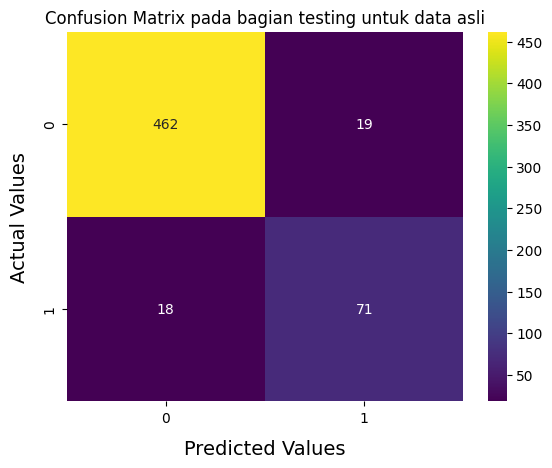

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

komponen-komponennya:

**Sumbu X: Predicted Values (Nilai Prediksi)**

0: Model memprediksi non-churn
1: Model memprediksi churn

**Sumbu Y: Actual Values (Nilai Sebenarnya)**

0: class sebenarnya non-churn
1: class sebenarnya churn

Nilai dalam setiap sel:

- Kiri Atas (462): True Negatives (TN) - Benar diprediksi non-churn
 - Sebanyak 462 pelanggan sebenarnya non-churn dan model memprediksi mereka sebagai non-churn dengan benar.

- Kanan Atas (19): False Positives (FP) - Salah diprediksi churn
 - Sebanyak 19 pelanggan sebenarnya non-churn, tetapi model salah memprediksi mereka sebagai churn.

- Kiri Bawah (18): False Negatives (FN) - Salah diprediksi non-churn
 - Sebanyak 18 pelanggan sebenarnya churn, tetapi model salah memprediksi mereka sebagai non-churn.

- Kanan Bawah (71): True Positives (TP) - Benar diprediksi churn
 - Sebanyak 71 pelanggan sebenarnya churn dan model memprediksi mereka sebagai churn dengan benar.


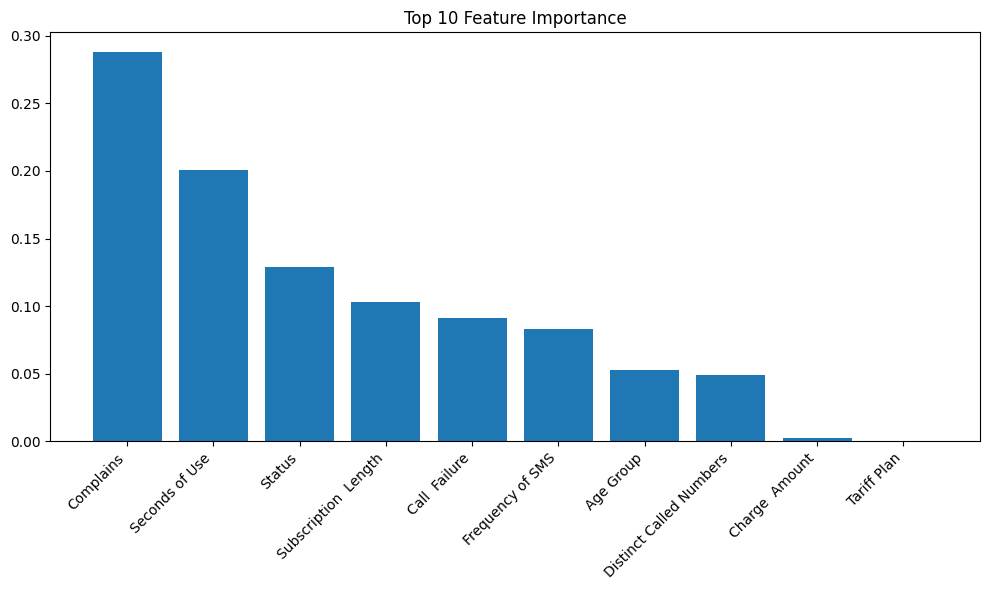

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Feature importance menunjukkan atau mengidentifikasi seberapa besar pengaruh masing-masing fitur terhadap prediksi model.

### hyperparameter tuning

proses mencari kombinasi nilai yang optimal untuk meningkatkan kinerja model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score: 0.9390350877192983


- Pada Best parameters, max_depth: 15 menunjukkan batas maksimum kedalaman pohon untuk menghindari overfitting, Setiap daun pohon minimal memiliki 2 sampel, dan minimal 10 sampel untuk membagi node.
- Best cross-validation score: 93.90%, menunjukkan bahwa model dengan parameter ini memiliki generalisasi yang sedikit lebih baik dibandingkan model awal.

In [ ]:
# Evaluasi model terbaik
print("\nBest Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       481
           1       0.81      0.74      0.78        89

    accuracy                           0.93       570
   macro avg       0.88      0.86      0.87       570
weighted avg       0.93      0.93      0.93       570



Kesimpulan:
- Performa Model (Setelah Tuning): Accuracy, Precision, dan Recall 93.33% (sedikit lebih rendah dibandingkan sebelum tuning, yaitu 93.51%).
- Hyperparameter tuning menghasilkan pohon keputusan yang lebih terkontrol (pruned), sehingga lebih stabil model menjadi lebih stabil dengan skor cross-validation terbaik (93.90%).

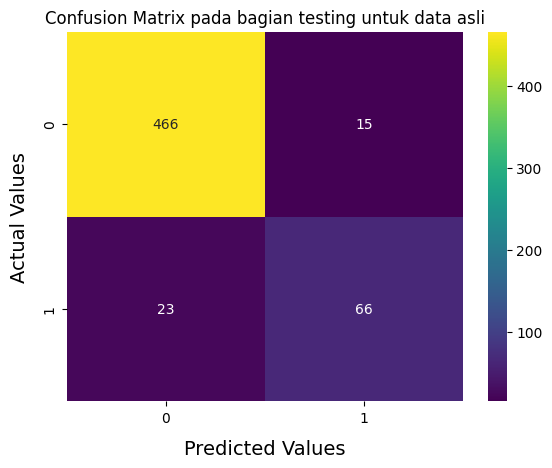

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

Setelah Hyperparameter Tunning:
- Kiri Atas (466): True Negatives (TN) - Benar diprediksi non-churn
 - Sebanyak 466 pelanggan sebenarnya non-churn dan model memprediksi mereka sebagai non-churn dengan benar, (mengalami peningkatan dari sebelumnya 462).

- Kanan Atas (15): False Positives (FP) - Salah diprediksi churn
 - Sebanyak 15 pelanggan sebenarnya non-churn, tetapi model salah memprediksi mereka sebagai churn, (mengalami penurunan dari sebelumnya 19).

- Kiri Bawah (23): False Negatives (FN) - Salah diprediksi non-churn
 - Sebanyak 23 pelanggan sebenarnya churn, tetapi model salah memprediksi mereka sebagai non-churn (bertambah dari sebelumnya 18).

- Kanan Bawah (66): True Positives (TP) - Benar diprediksi churn
 - Sebanyak 66 pelanggan sebenarnya churn dan model memprediksi mereka sebagai churn dengan benar (berkurang dari sebelumnya 71).


 Kesimpulan: Dengan berfokus pada mendeteksi pelanggan yang churn, model sebelum tuning lebih optimal. Meskipun setelah tuning model lebih baik dalam memprediksi pelanggan yang tidak churn (kelas mayoritas), namun model lebih sering salah dalam mendeteksi churn. Dengan kata lain, setelah tuning, model menjadi lebih baik secara keseluruhan, tetapi performa pada fokus utama (kelas churn) justru menurun.

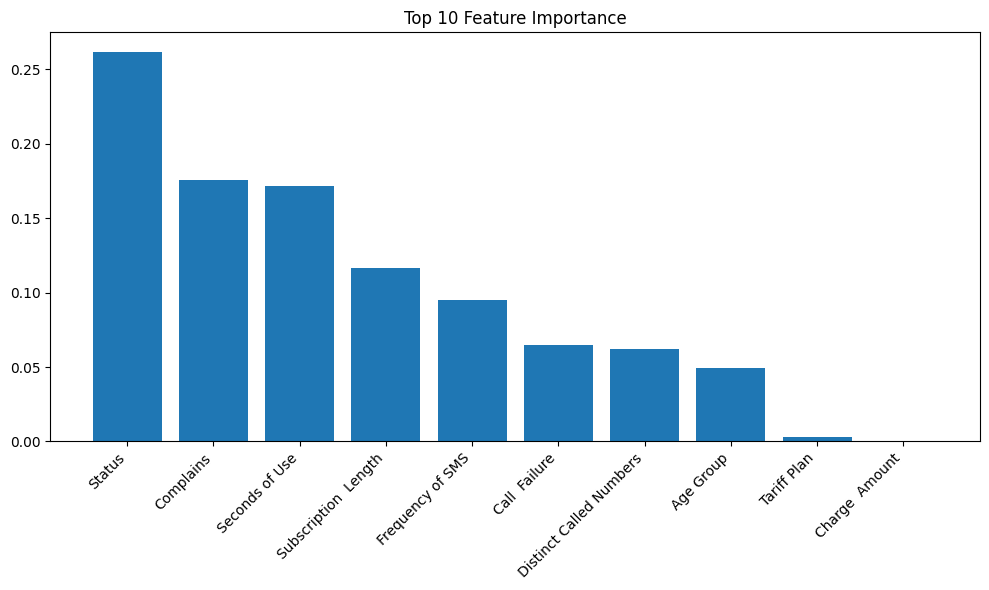

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### simpan model terbaik

In [ ]:
import joblib

# Simpan model terbaik
joblib.dump(best_dt_model, f'{folder_name}/best_hepatitis_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_hepatitis_predictor_model.joblib'")

Model terbaik telah disimpan sebagai 'best_hepatitis_predictor_model.joblib'


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan
- GUNAKAN CEK UNDERFITTING DAN OVERFITTING DAN LEARNING CURVE

#### Membandingkan Akurasi Training vs Testing:

In [ ]:
from sklearn.metrics import accuracy_score

# Untuk model Decision Tree terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9785087719298246
Testing Accuracy: 0.9333333333333333


Akurasi training (0.978 atau 97.85%) lebih tinggi daripada akurasi testing (0.933 atau 93.33%), berarti model bekerja sangat baik pada data pelatihan, tetapi performanya sedikit menurun pada data uji. Selisihnya tidak begitu besar (4.5%) sehingga model masih bisa dianggap cukup stabil dalam memprediksi data baru dan kemungkinan tidak terjadi overfitting ( terlalu fokus pada detail dari data pelatihan).

#### learning curve

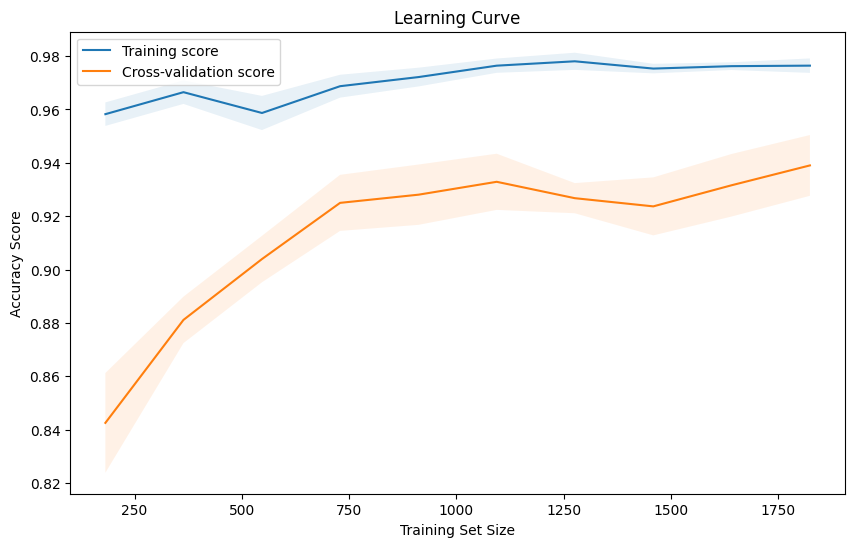

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

Grafik learning curve diatas menunjukkan hubungan antara ukuran data pelatihan (sumbu X) dan akurasi model (sumbu Y), sesuai dengan hasil perbandingan Akurasi Training vs Testing.
- Garis training score (biru): menunjukkan performa model pada data pelatihan, dimana model sangat baik dalam mempelajari data pelatihan.
- Garis cross-validation score (orange): performa model pada data validasi, dimana nilainya lebih rendah dibandingkan data pelatihan, tetapi meningkat seiring bertambahnya ukuran data pelatihan.

#### cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV score:", np.std(cv_scores))

Cross-validation scores: [0.93859649 0.95394737 0.91885965 0.94298246 0.94078947]
Mean CV score: 0.9390350877192983
Standard deviation of CV score: 0.011386627180479973


#### Complexity Curve (untuk Decision Tree):

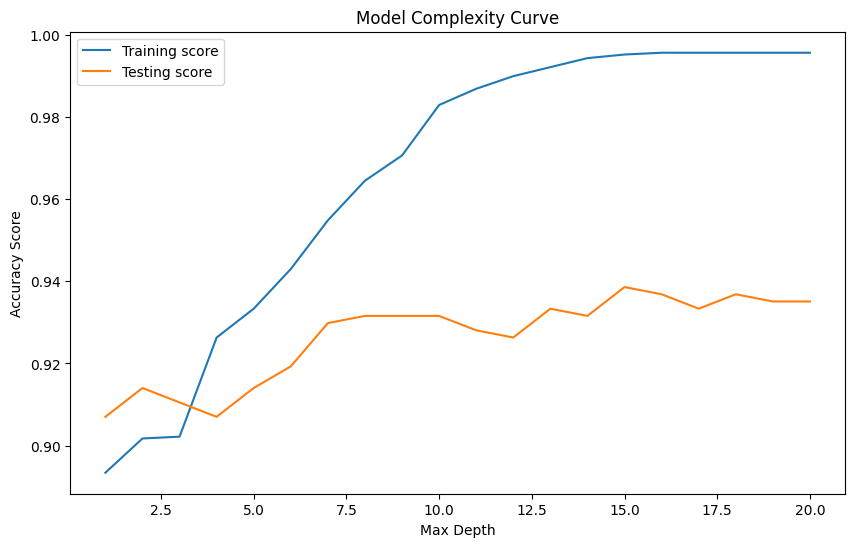

In [ ]:
max_depths = range(1, 21)  #digunakan untuk nilai integer dari 1 sampai 20
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10,6))
plt.plot(max_depths, train_scores, label='Training score')
plt.plot(max_depths, test_scores, label='Testing score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity Curve')
plt.legend()
plt.show()

1. Sumbu X menunjukkan Max Depth atau tingkat kedalaman (depth) decision tree. Besar nilai kedalaman, semakin kompleks modelnya.
2. Sumbu Y menunjukkan skor akurasi model, baik pada data training (garis biru) maupun data testing (garis oranye).

- Pada kedalaman kecil (misalnya, 2-5), garis training dan testing memiliki skor rendah.
- Pada kedalaman sekitar 7-10, akurasi testing mencapai puncaknya, dan akurasi training masih meningkat.
- Setelah kedalaman lebih dari 10, akurasi training terus meningkat mendekati 100% (overfitting ke data training). Namun, akurasi testing mulai stagnan atau menurun sedikit, menunjukkan overfitting, yaitu model terlalu kompleks.

Sehingga, model yang optimal (Sweet spot (titik optimal)) berada di kedalaman sekitar 7-10, karena akurasi testing berada di puncak pada rentang ini.

### visualisasi Decision tree versi standar

In [ ]:
from sklearn.tree import plot_tree

Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'


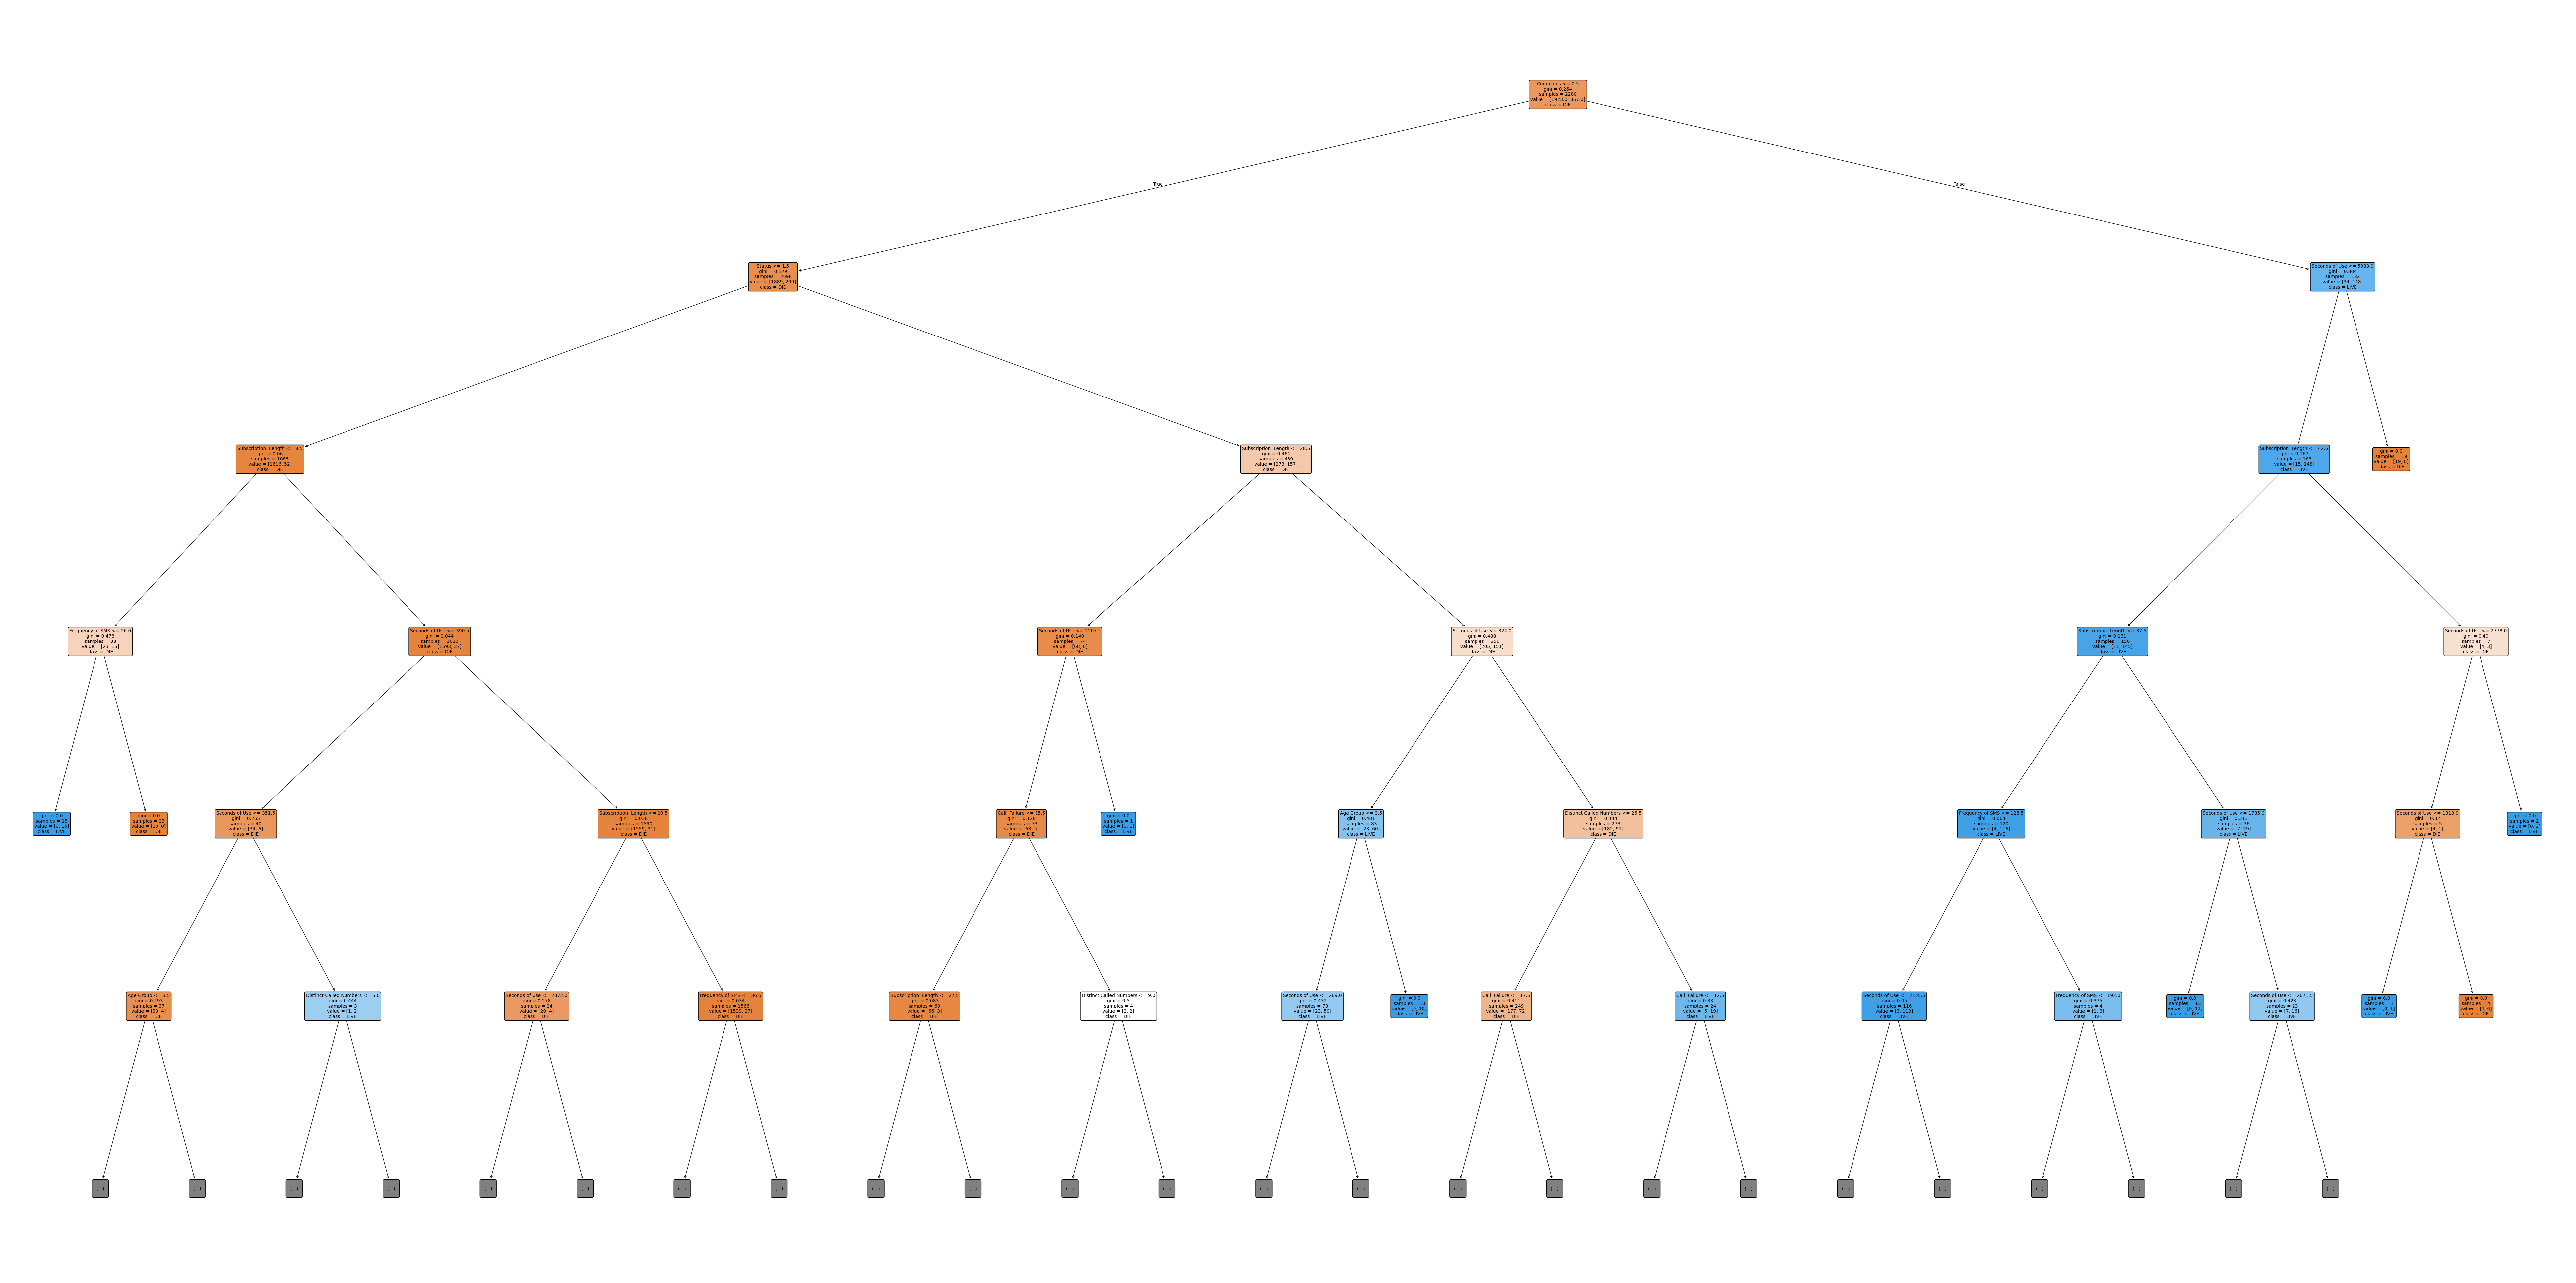

In [ ]:
# Buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(dt_model, feature_names=X.columns, class_names=['DIE', 'LIVE'],
          filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'")

### visualisasi decision tree versi hyperparameter

Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'


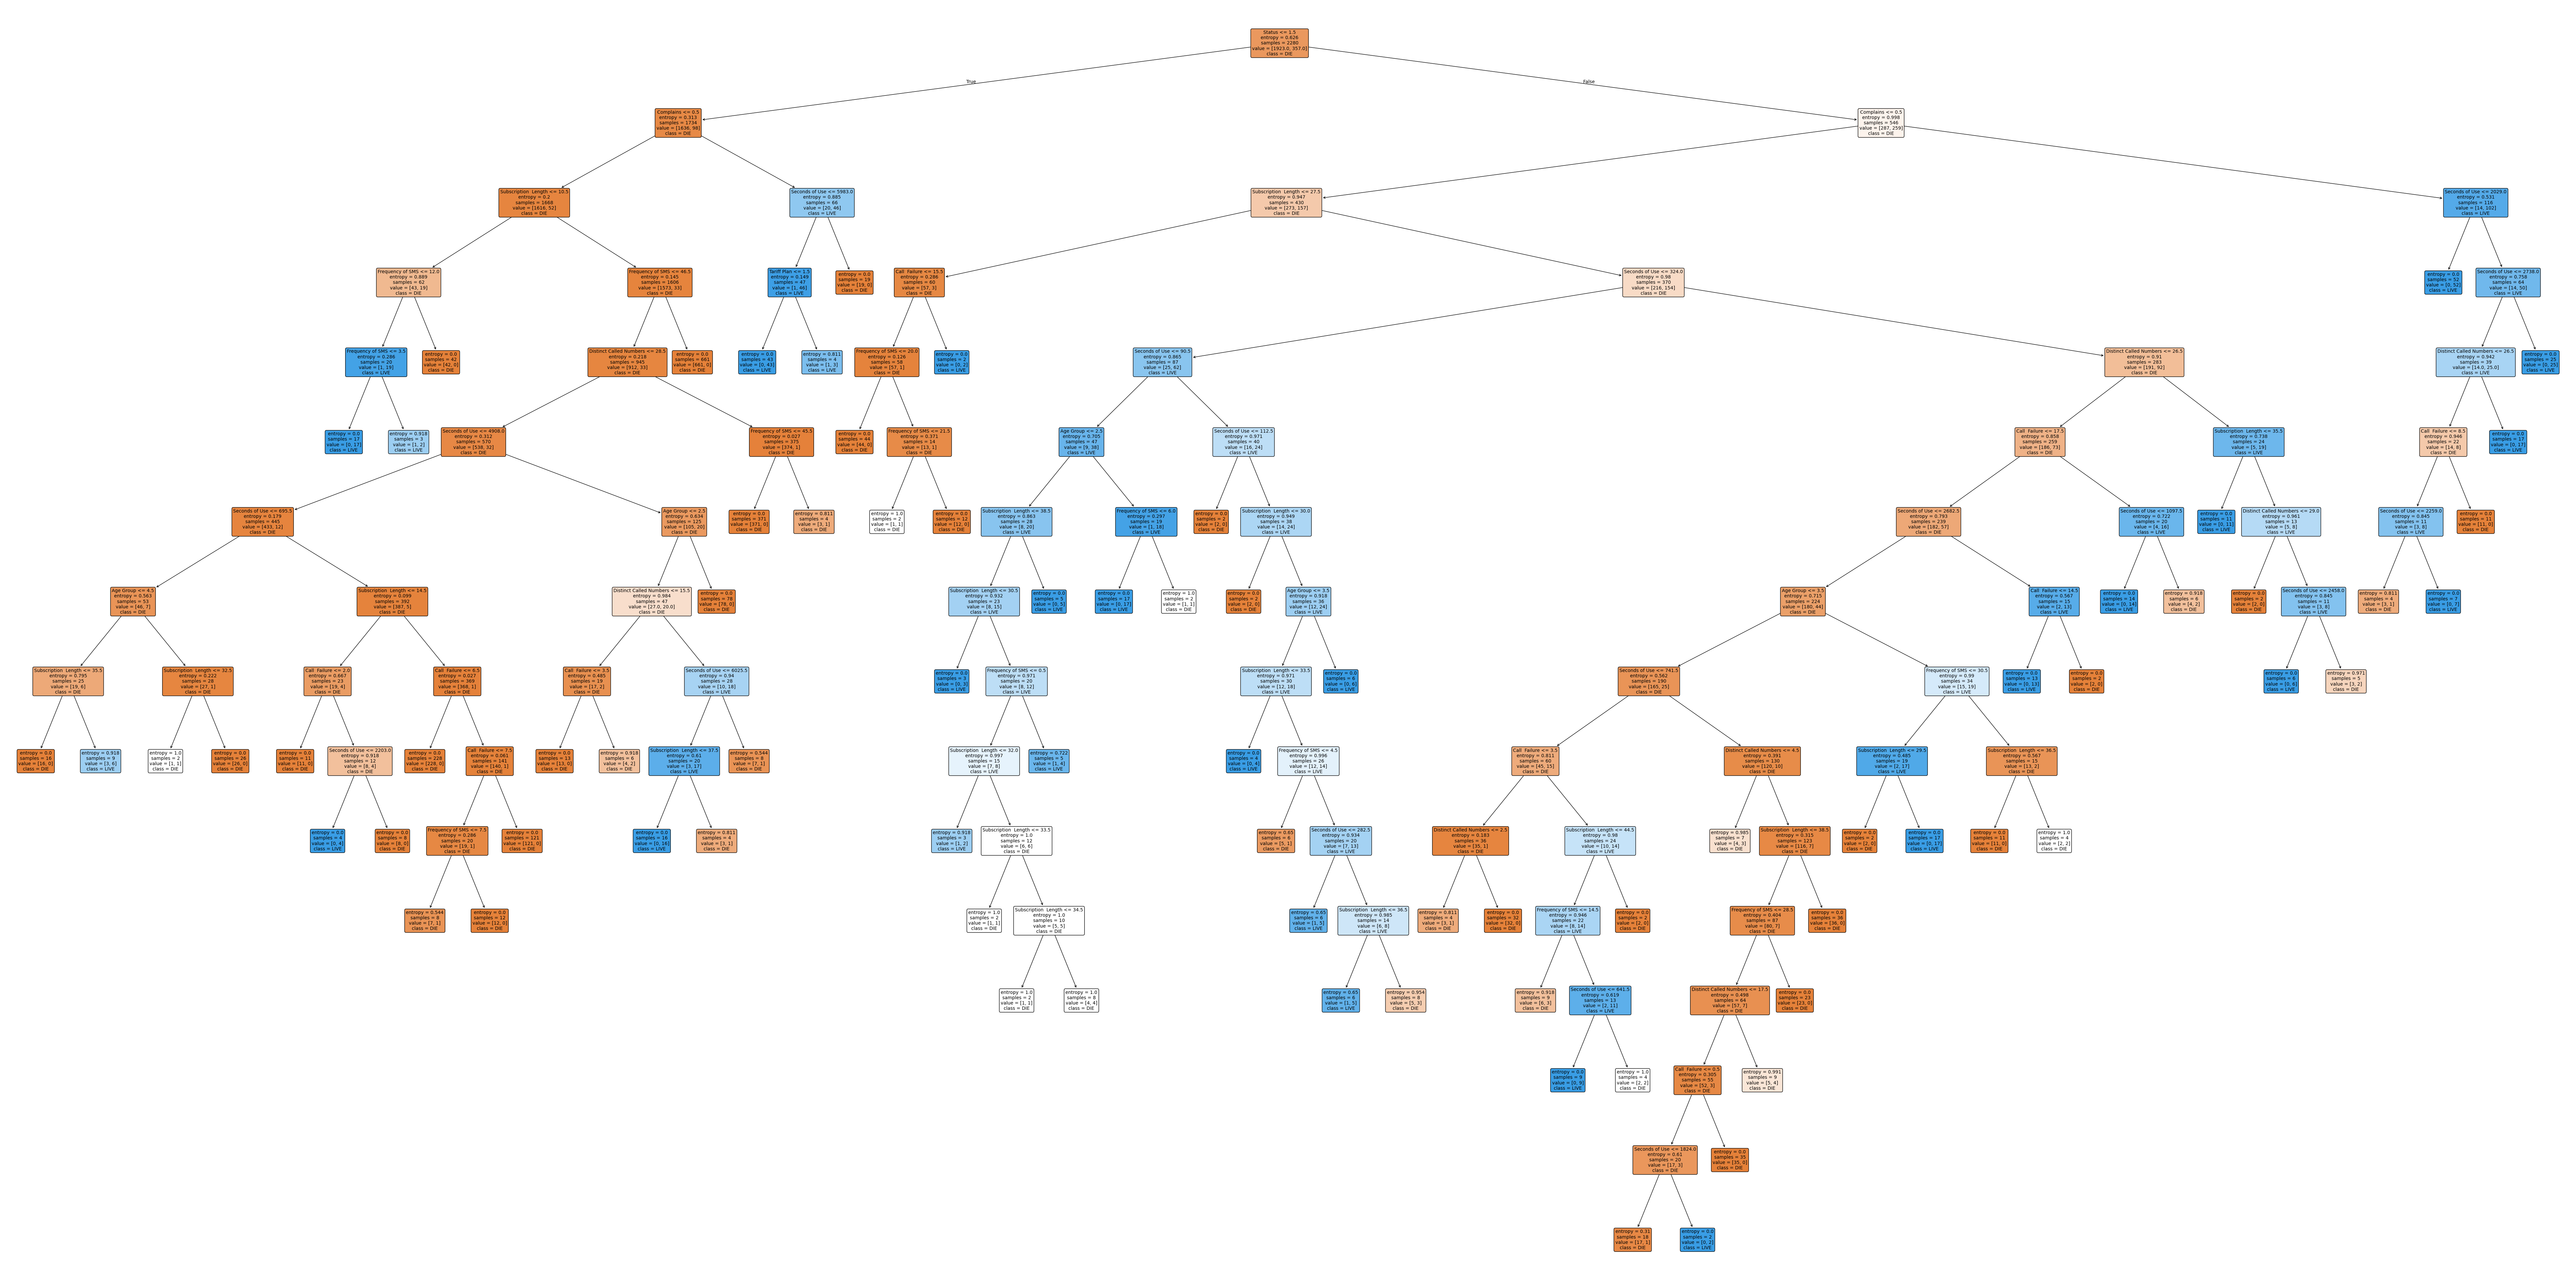

In [ ]:
# Buat gambar dengan ukuran yang sangat besar
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(best_dt_model, feature_names=X.columns, class_names=['DIE', 'LIVE'],
          filled=True, rounded=True, fontsize=10)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'")

<CENTER><b>-- SELESAI --</b></CENTER>